In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("Retail Sales Analysis_utf.csv")

# Preview
df.head()


,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


In [ ]:
#----------------------Basic Exploration

In [27]:
df.info()          # Data types & missing values
df.describe()      # Summary statistics
df.isnull().sum()  # Missing value count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactions_id  2000 non-null   int64  
 1   sale_date        2000 non-null   object 
 2   sale_time        2000 non-null   object 
 3   customer_id      2000 non-null   int64  
 4   gender           2000 non-null   object 
 5   age              1990 non-null   float64
 6   category         2000 non-null   object 
 7   quantiy          1997 non-null   float64
 8   price_per_unit   1997 non-null   float64
 9   cogs             1997 non-null   float64
 10  total_sale       1997 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 172.0+ KB


transactions_id     0
sale_date           0
sale_time           0
customer_id         0
gender              0
age                10
category            0
quantiy             3
price_per_unit      3
cogs                3
total_sale          3
dtype: int64

In [29]:
# Fill missing categorical with "NA"
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna("NA")

# Fill missing numeric with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [31]:
df.isnull().sum()  # Missing value count

transactions_id    0
sale_date          0
sale_time          0
customer_id        0
gender             0
age                0
category           0
quantiy            0
price_per_unit     0
cogs               0
total_sale         0
dtype: int64

In [ ]:
#----------------Basic KPIs

In [41]:
# Total Sales
total_sales = df['total_sale'].sum()

print(total_sales)


912170.0


In [45]:
revenue_per_category=df.groupby('category')['total_sale'].sum().reset_index()
print(revenue_per_category)

      category  total_sale
0       Beauty    287140.0
1     Clothing    311220.0
2  Electronics    313810.0


In [49]:
# Average Order Value
avg_order_value=df['total_sale'].mean()
print(avg_order_value)

456.085


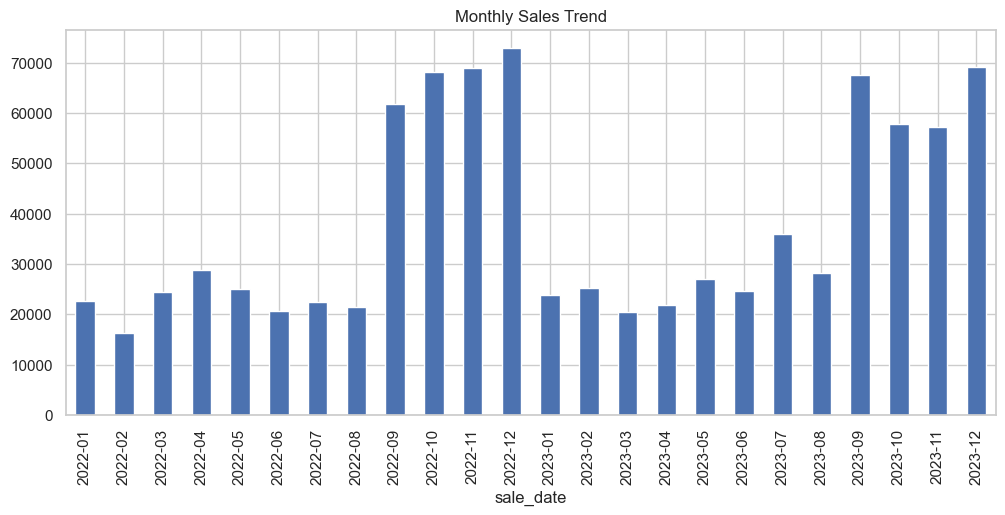

In [51]:
# ---------Sales Trends & Seasonality
# Convert sale_date to datetime
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Monthly sales trend
monthly_sales = df.groupby(df['sale_date'].dt.to_period('M'))['total_sale'].sum()
monthly_sales.plot(kind='bar', figsize=(12,5))
plt.title("Monthly Sales Trend")
plt.show()


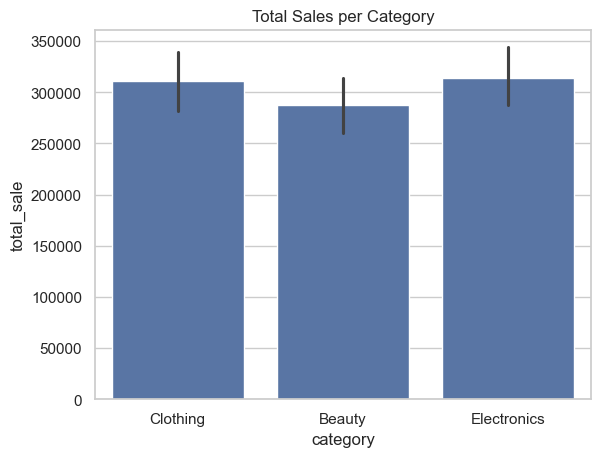

In [53]:
#----------Category-wise Analysis
sns.barplot(x='category', y='total_sale', data=df, estimator=sum)
plt.title("Total Sales per Category")
plt.show()

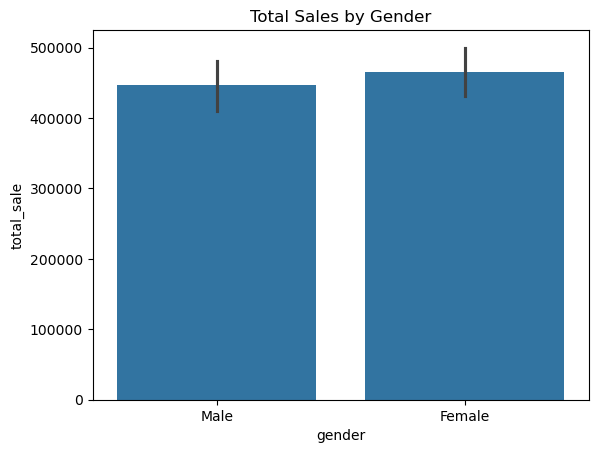

In [5]:
#------Gender-based Sales
sns.barplot(x='gender', y='total_sale', data=df, estimator=sum)
plt.title("Total Sales by Gender")
plt.show()


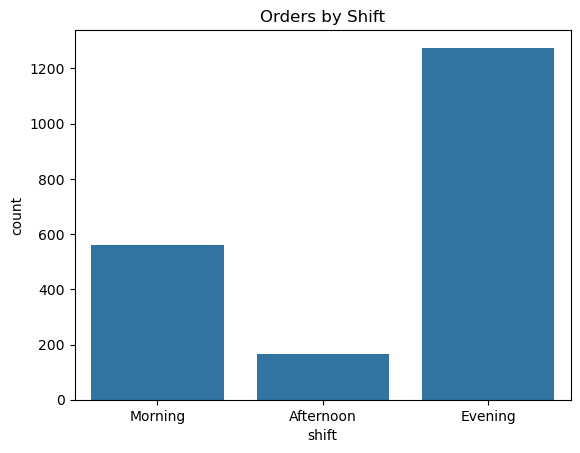

In [7]:
#------------------------- Time of Day (Shift) Analysis
# Create shift column
df['hour'] = pd.to_datetime(df['sale_time'], format='%H:%M:%S').dt.hour
df['shift'] = pd.cut(df['hour'], bins=[0,12,17,24], labels=['Morning','Afternoon','Evening'], right=False)

sns.countplot(x='shift', data=df)
plt.title("Orders by Shift")
plt.show()

